https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/6737946-entrainez-vous-selectionnez-le-nombre-de-voisins-dans-un-knn-pour-une-regression

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

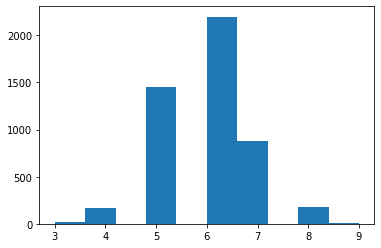

In [6]:
plt.hist(data['quality'])

In [7]:
X = data[data.columns[:-1]].values
y = data['quality'].values

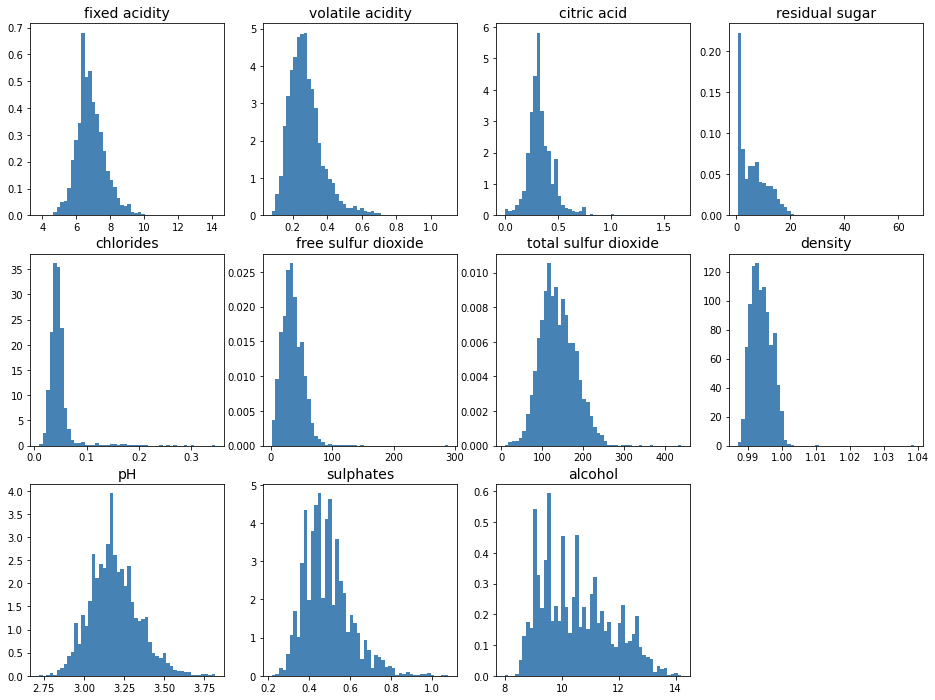

In [8]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

A bad wine as a quality < 6

In [9]:
y_class = np.where(y<6, 0, 1)

In [10]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

In [11]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [12]:
from sklearn import neighbors, metrics

param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

score = 'accuracy'

clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring=score
)

In [13]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [14]:
clf.best_params_

{'n_neighbors': 15}

In [15]:
clf.cv_results_

{'mean_fit_time': array([0.00244803, 0.00226121, 0.00233426, 0.00241413, 0.00227304,
        0.00228925, 0.00231848]),
 'std_fit_time': array([1.92981388e-04, 3.41514621e-05, 9.81178170e-05, 1.89118306e-04,
        4.58127116e-05, 1.28802305e-04, 1.11025427e-04]),
 'mean_score_time': array([0.02555666, 0.02670541, 0.02786641, 0.02869048, 0.02972951,
        0.0302681 , 0.03126855]),
 'std_score_time': array([0.00146087, 0.00122652, 0.00068741, 0.00126244, 0.00098741,
        0.00098608, 0.00128069]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.75072886, 0.74635569, 0.74781341, 0.76822157, 0.76093294,
        0.75947522, 0.75655977]),
 'split1_test_s

In [16]:
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.744 (+/-0.016) for {'n_neighbors': 3}
accuracy = 0.749 (+/-0.032) for {'n_neighbors': 5}
accuracy = 0.750 (+/-0.013) for {'n_neighbors': 7}
accuracy = 0.758 (+/-0.023) for {'n_neighbors': 9}
accuracy = 0.760 (+/-0.025) for {'n_neighbors': 11}
accuracy = 0.762 (+/-0.018) for {'n_neighbors': 13}
accuracy = 0.763 (+/-0.019) for {'n_neighbors': 15}


In [17]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test, accuracy : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test, accuracy : 0.766


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[264, 222],
       [122, 862]])

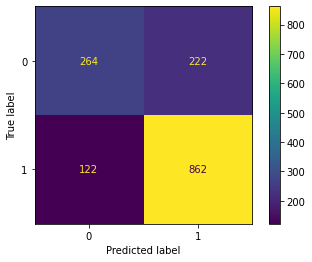

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='viridis')
plt.show()

In [20]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.8760162601626016

In [21]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7952029520295203

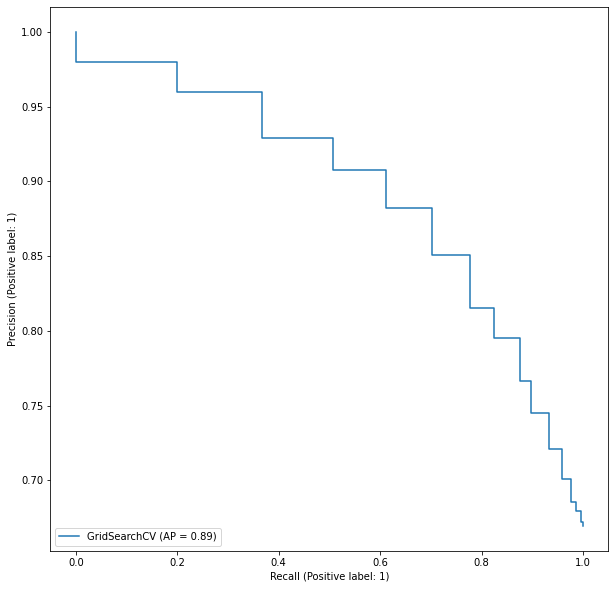

In [22]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(10, 10))
PrecisionRecallDisplay.from_estimator(clf, X_test_std, y_test, ax=ax)
plt.show()

In [23]:
clf.predict_proba(X_test_std)

array([[0.26666667, 0.73333333],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       ...,
       [0.8       , 0.2       ],
       [0.46666667, 0.53333333],
       [0.06666667, 0.93333333]])

In [24]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
np.max(y_pred_proba)


1.0

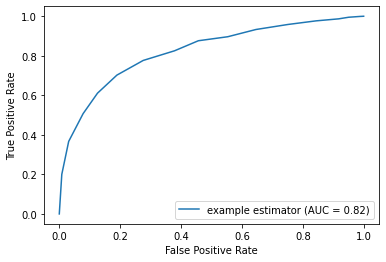

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()


Text(0.5, 1.0, 'ROC curve')

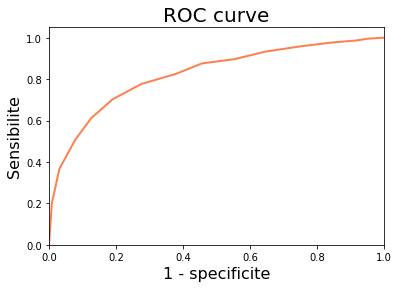

In [26]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=16)
plt.ylabel('Sensibilite', fontsize=16)
plt.title('ROC curve', fontsize=20)

In [27]:
clf.score(X_test_std, y_test)

0.7659863945578231

In [28]:
from sklearn import metrics
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.48


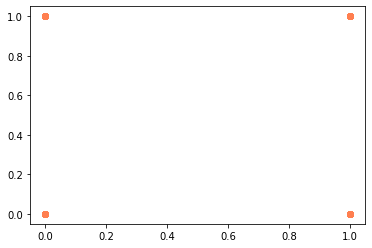

In [29]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred, color='coral')